In [2]:
#memanggil modul yang diperlukan

import cv2
import numpy as np
from matplotlib import pyplot as plt

#bgr

img = cv2.imread('Cat.jpeg')

#rgb

cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

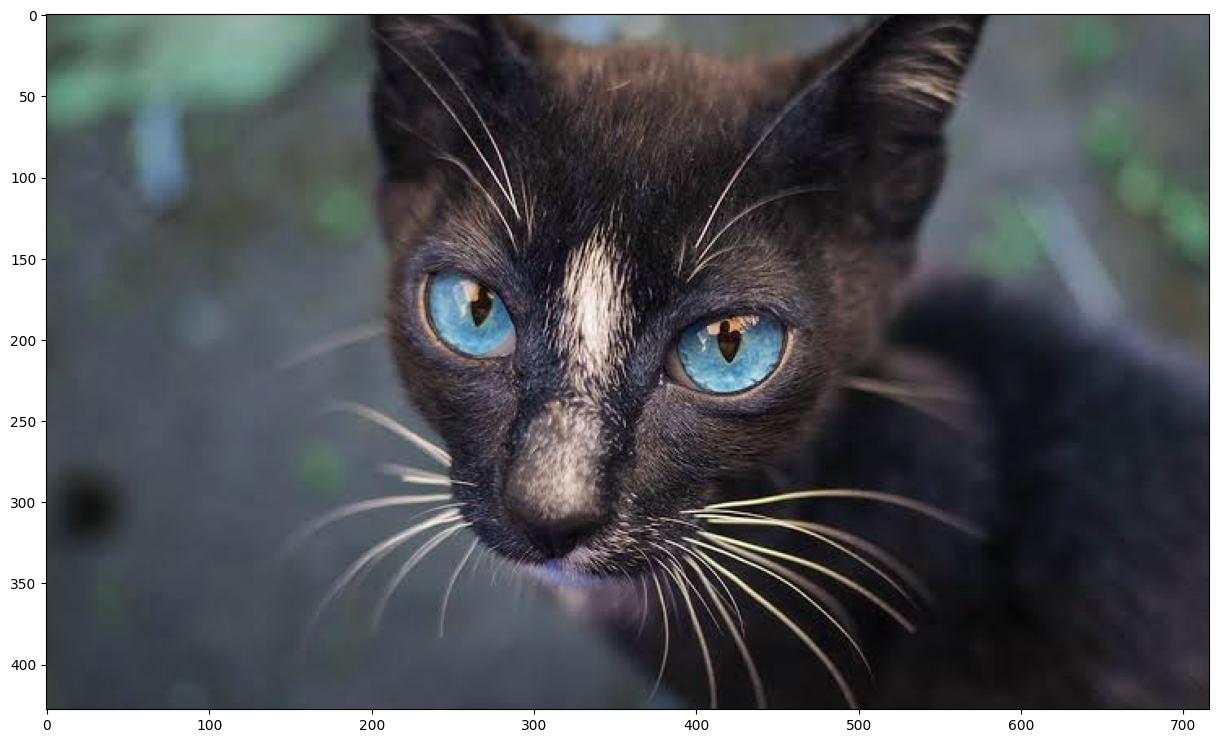

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


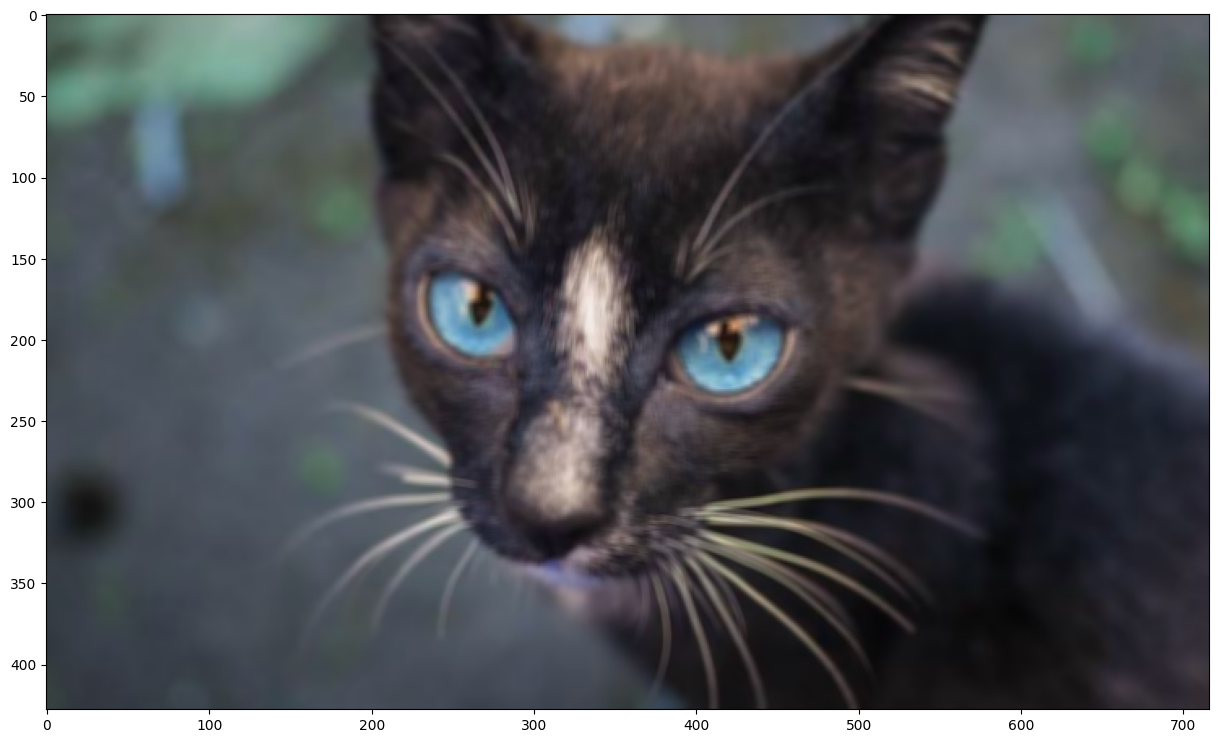

In [9]:

#menampilkan gambar awal tanpa filter

plt.imshow(img)
plt.show()

# membuat filter : matriks berukuran 5 x 5

kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering

Cat_filter = cv2.filter2D(img,-1,kernel)

# tampilkan gambar awal tanpa filter

plt.imshow(Cat_filter)
plt.show()

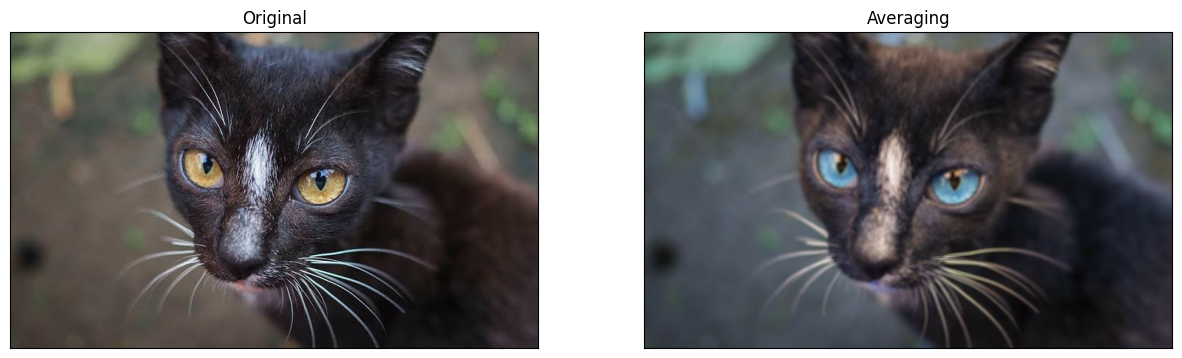

In [10]:
# perbesar ukuran hasil plotting jika diperlukan

plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli

plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter

plt.subplot(122),plt.imshow(Cat_filter), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

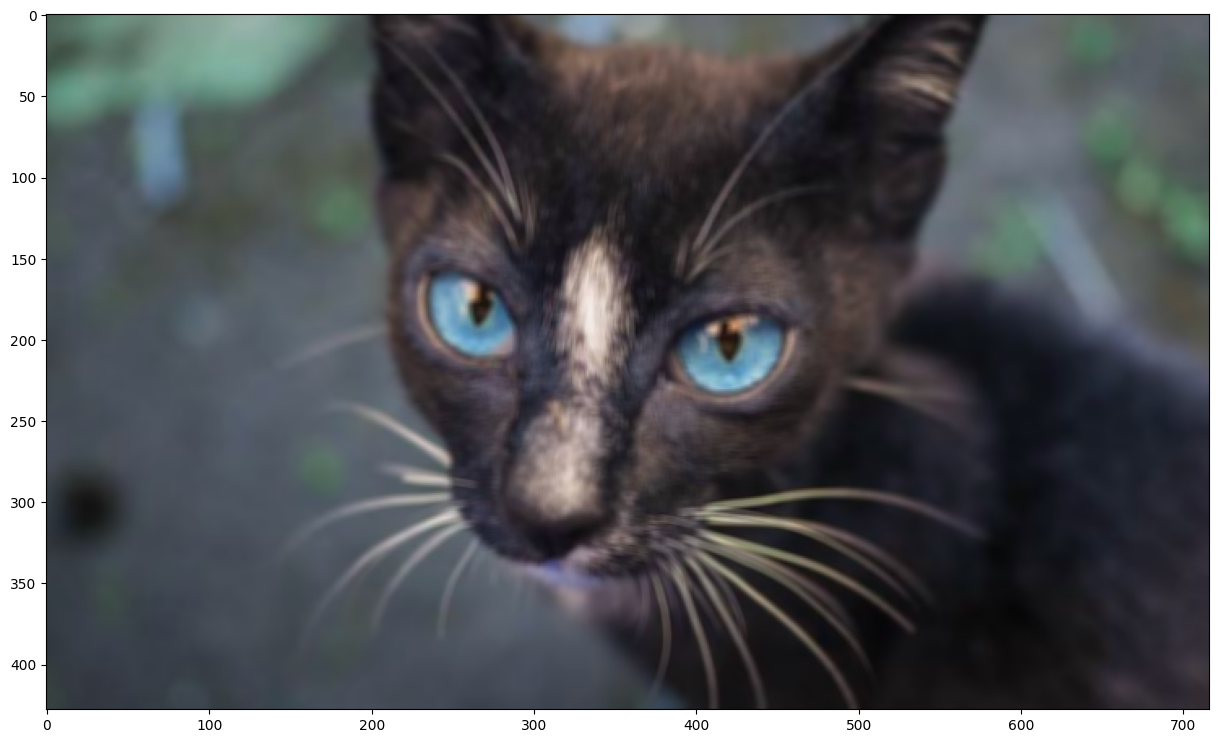

In [11]:
Cat_blur = cv2.blur(img,(5,5))

# tampilkan gambar awal tanpa filter

plt.imshow(Cat_blur)
plt.show()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


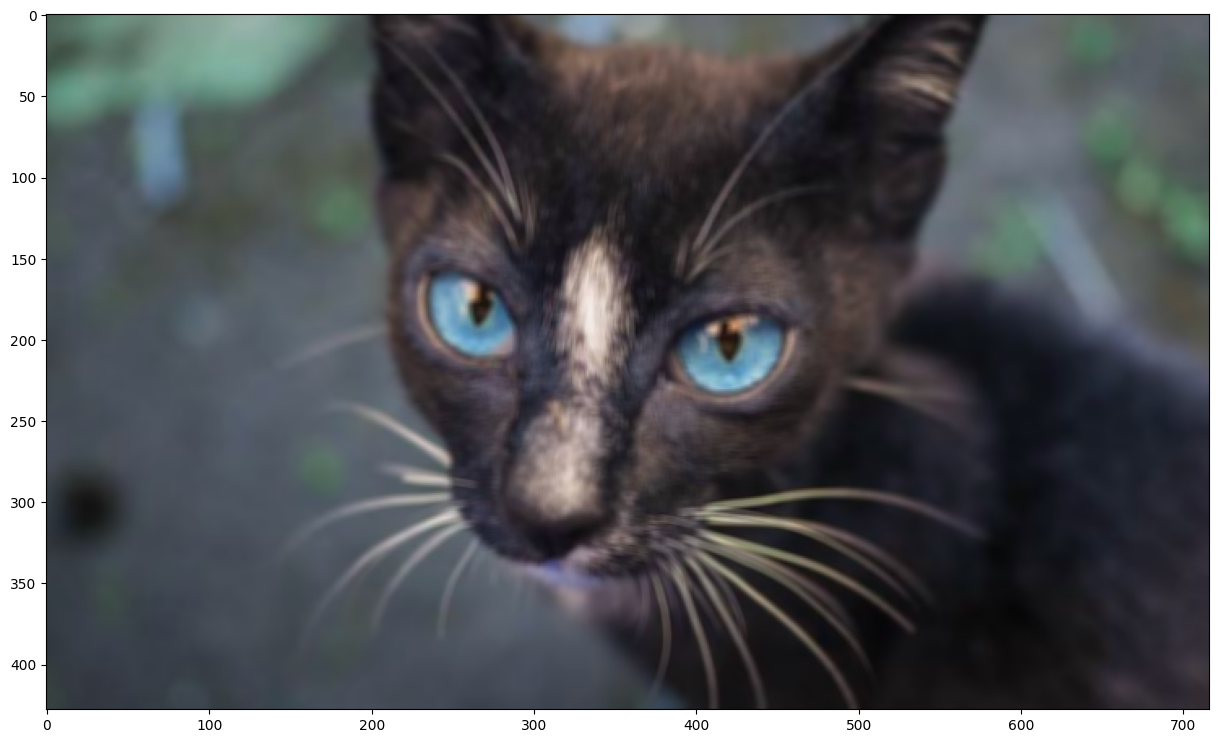

In [12]:
# ini adalah cara lain untuk membuat sebuah kernel,
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3

kernel = np.matrix([
[1, 1, 1],
[1, 2, 1],
[1, 1, 1]
])/25
print(kernel)

# buat lagi filteringnya

panda_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
# tampilkan gambar awal tanpa filter

plt.imshow(Cat_filter)
plt.show()

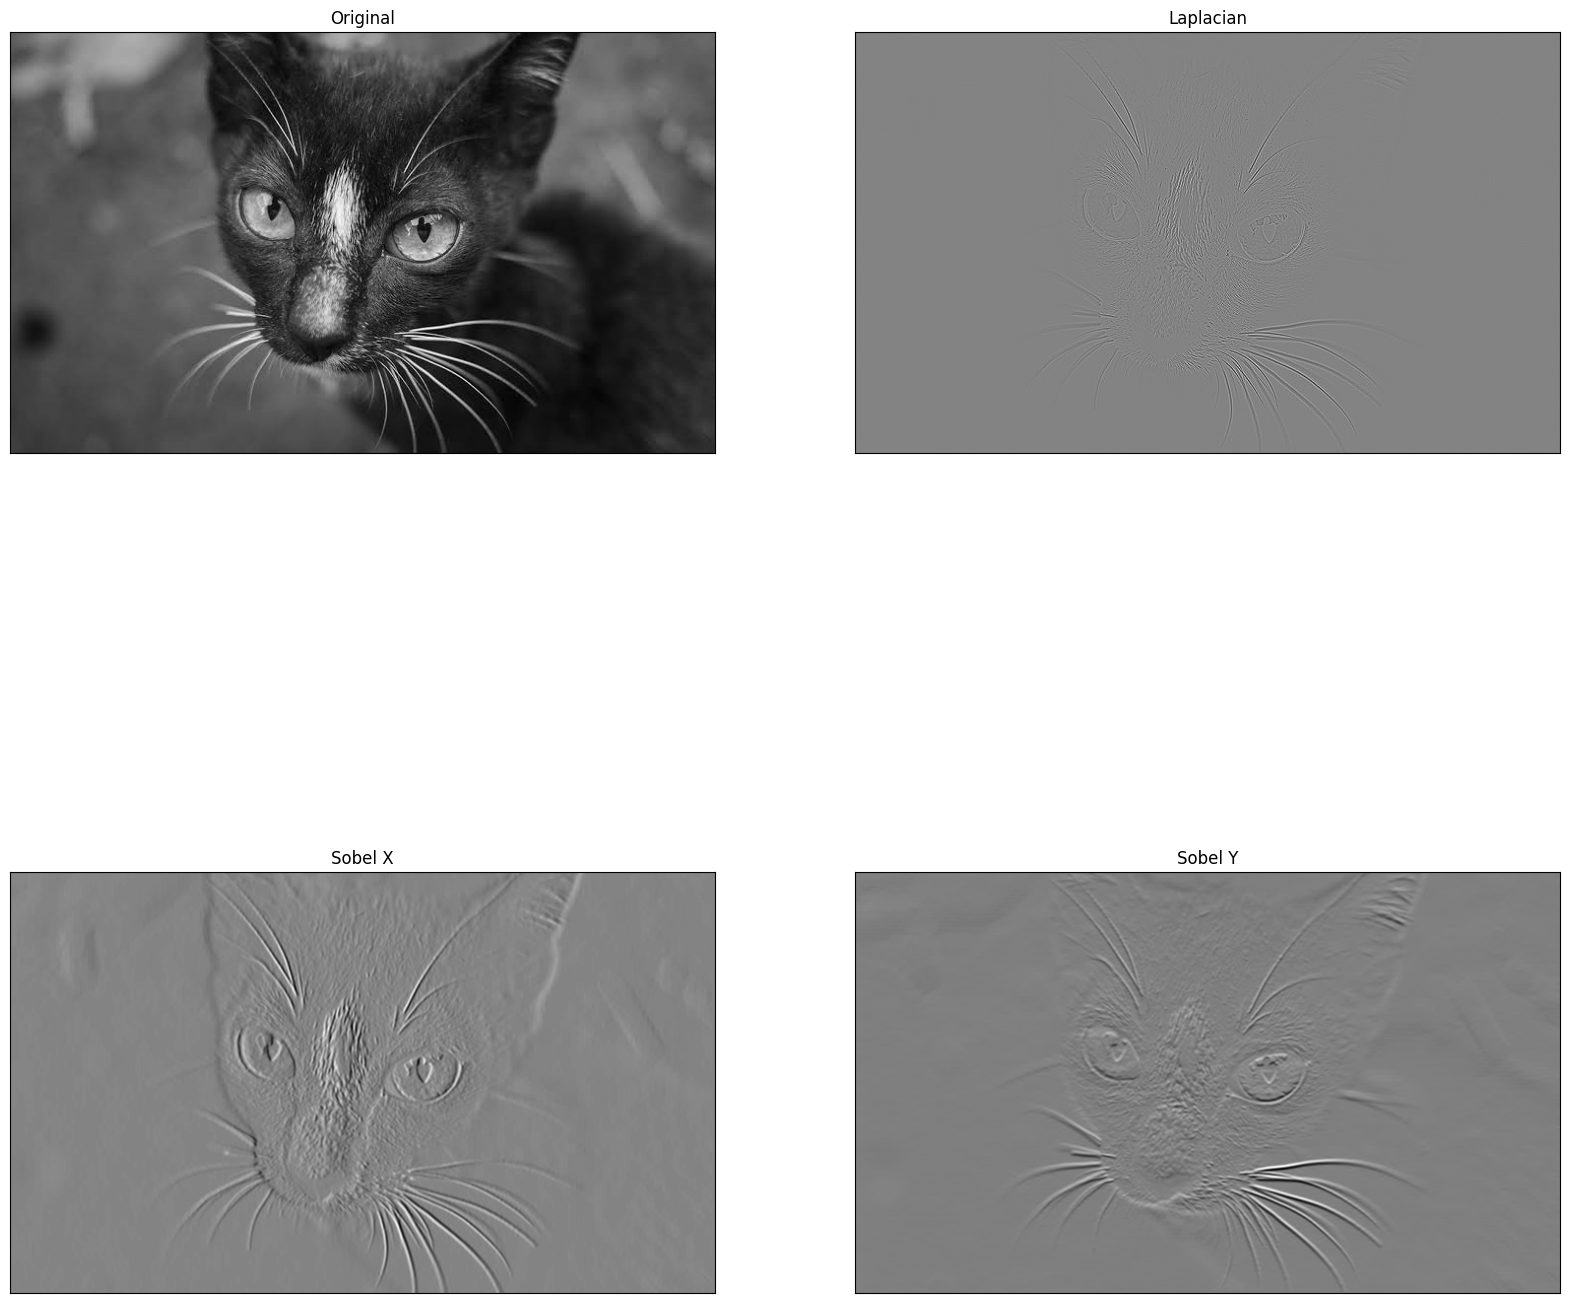

In [13]:
# Highpass Filter
# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja
# di bagian awal, selama notebook ini tetap terhubung

import cv2
import numpy as np
from matplotlib import pyplot as plt

# memanggil citra sebagai grayscale (argument 0)

img = cv2.imread('Cat.jpeg',0)

# menerapkan algoritma high-pass filtering: # laplacian

laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting

plt.rcParams["figure.figsize"] = (20,20)

# menampilkan hasil filter

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

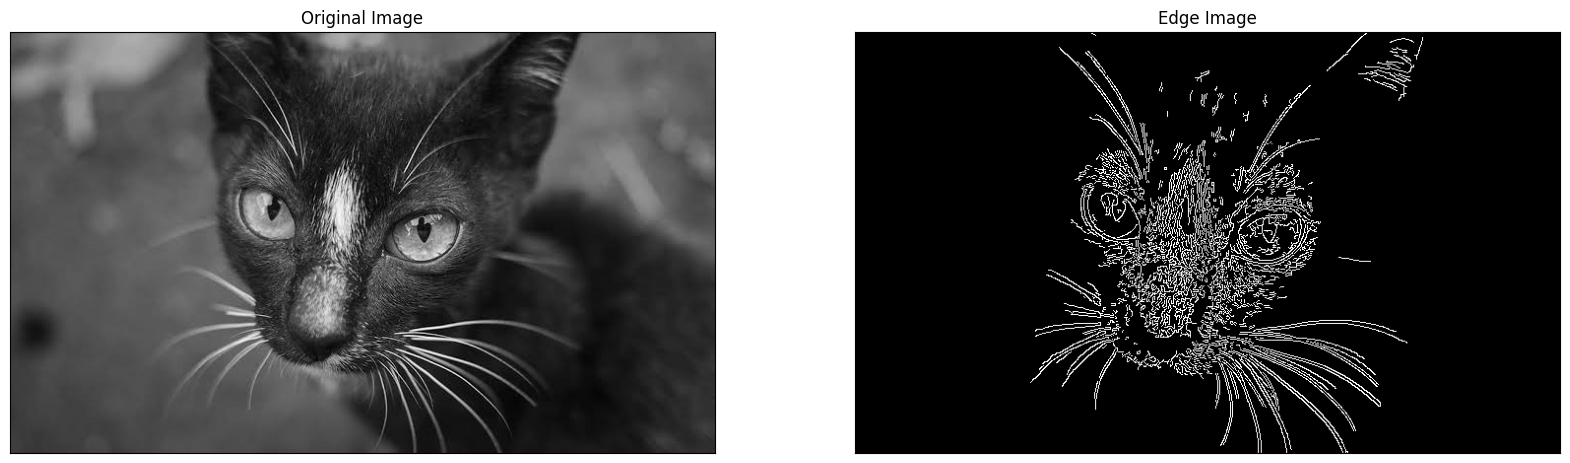

In [16]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('Cat.jpeg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)

edges = cv2.Canny(img,100,200)
plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

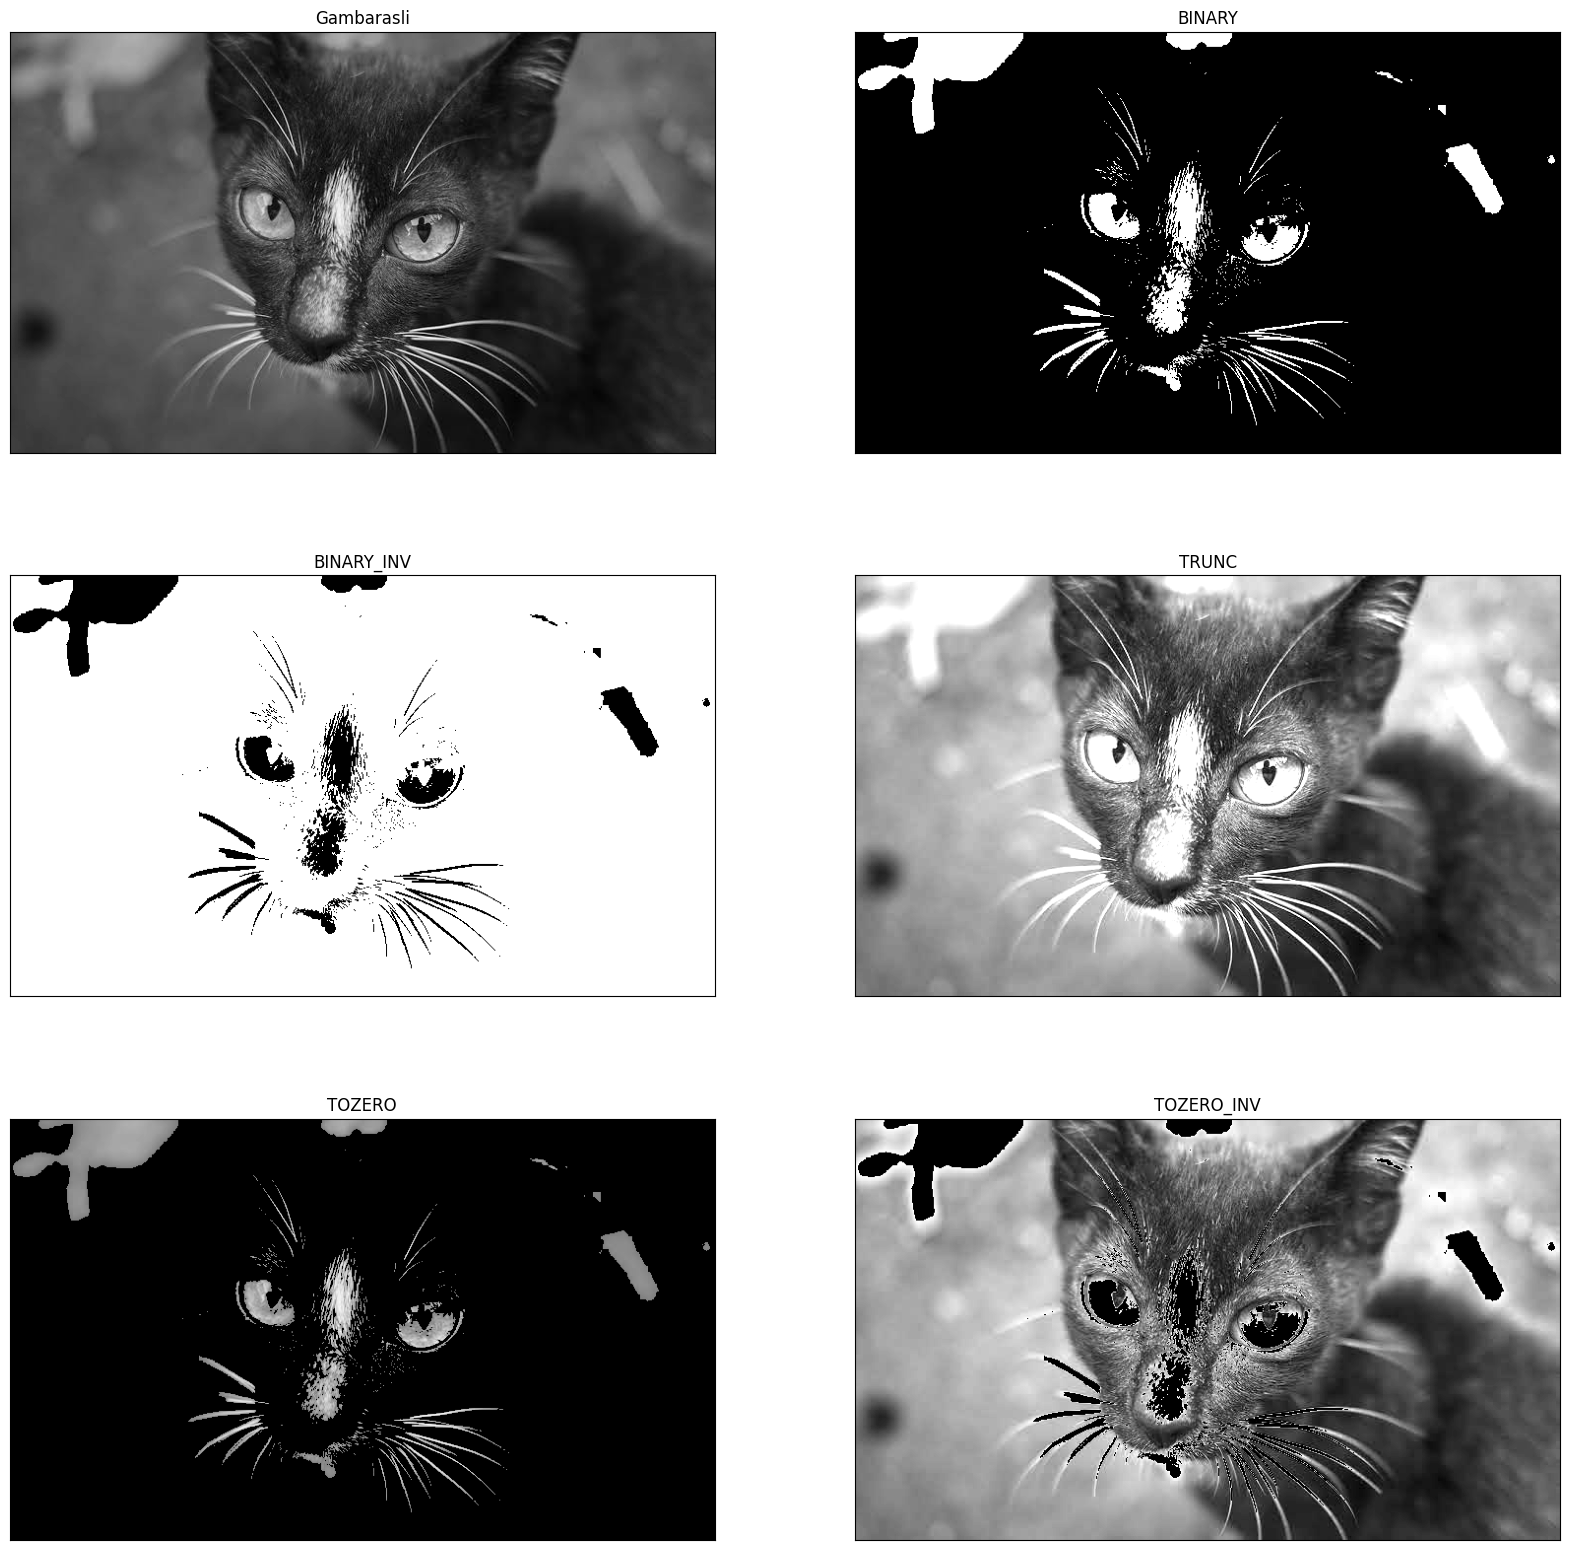

In [18]:
# membaca gambar cat

img = cv2.imread('Cat.jpeg',0)

# Hitungan threshold.
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi # yang diberikan

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil

titles = ['Gambarasli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus

for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

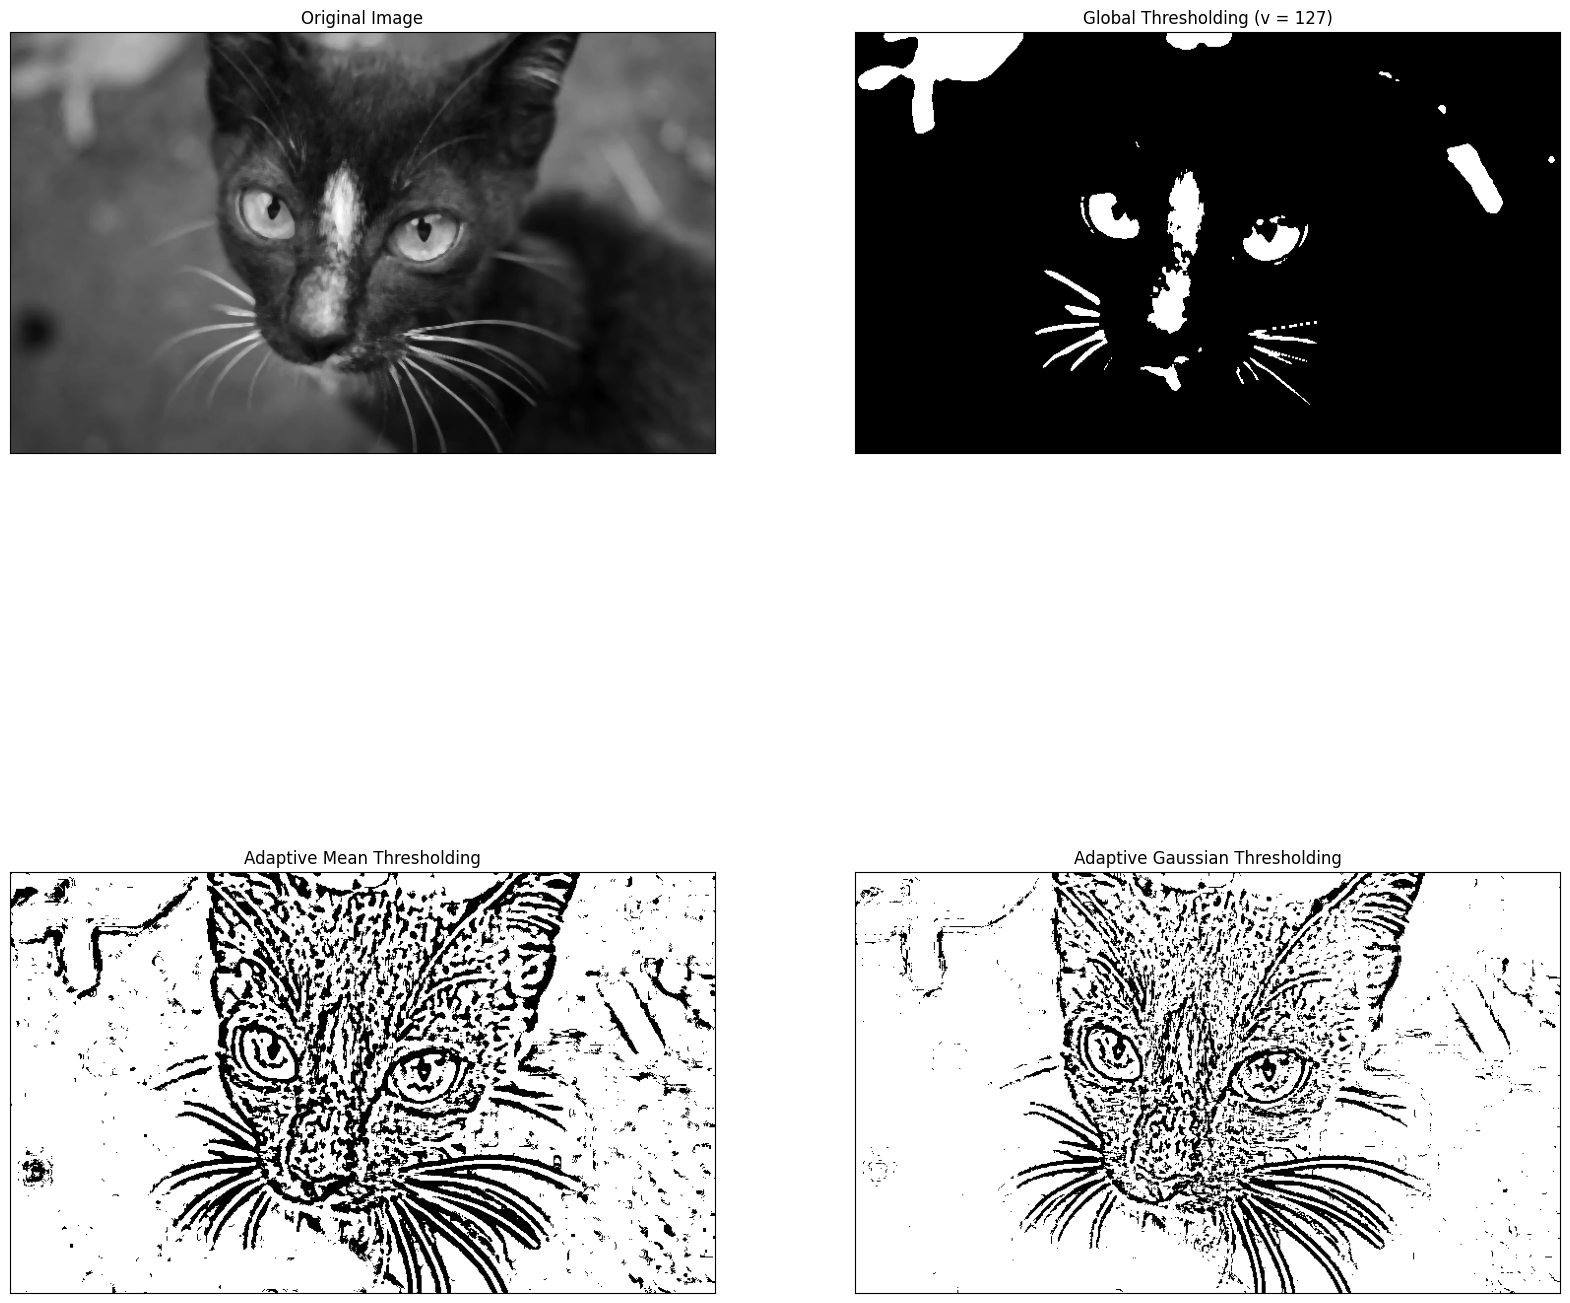

In [20]:

# masih menggunakan variabel img yang sama

img = cv2.imread('Cat.jpeg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik

img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# Plotting

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

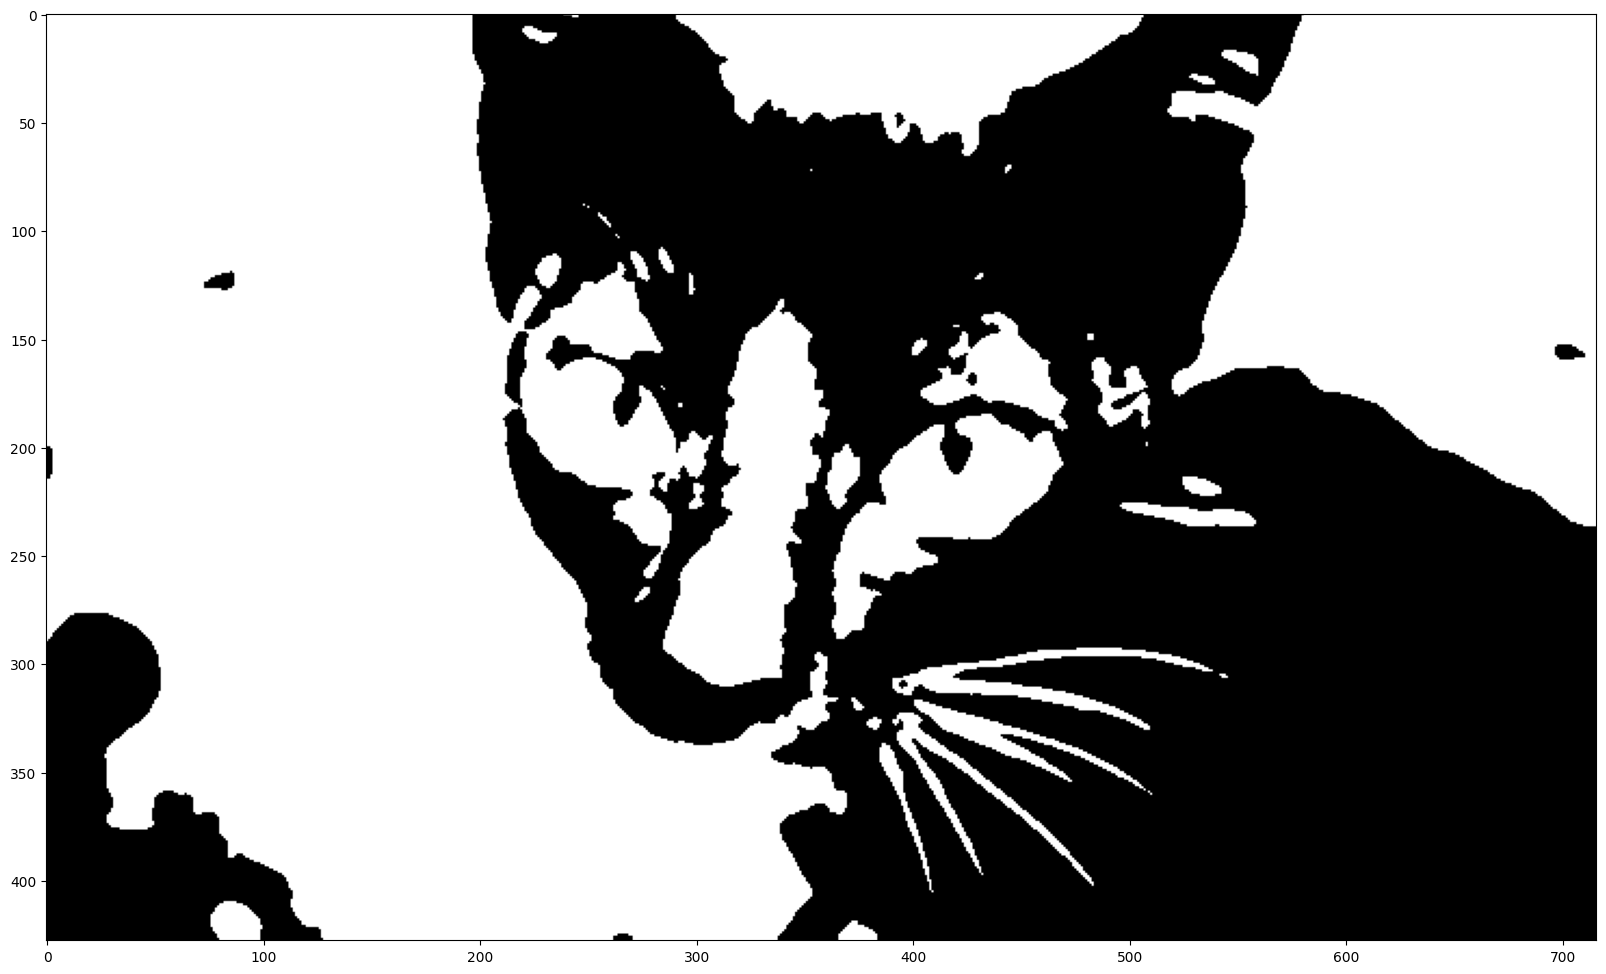

In [21]:

# Menerapkan Gaussian filtering sebelum Otsu’s thresholding

blur = cv2.GaussianBlur(img,(5,5),0)

# Otsu

ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plotting

plt.imshow(th3,'gray')
plt.show()

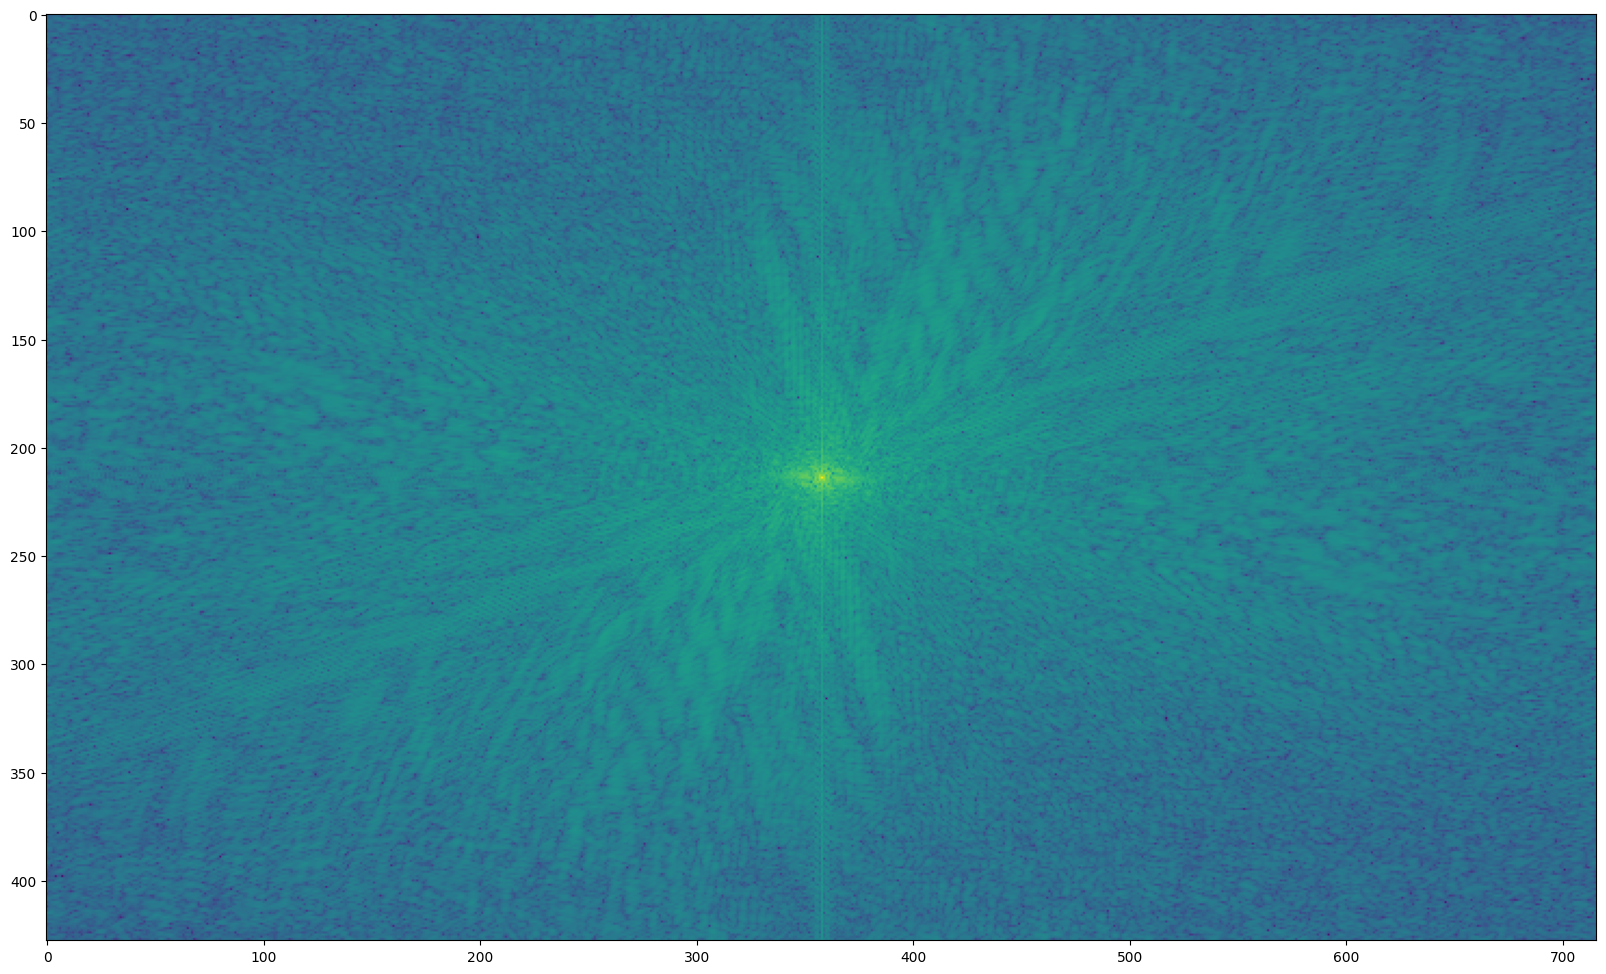

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Cat.jpeg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
fourier_shift = np.fft.fftshift(fourier)

# hitung Fourier Transform

magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# menormalisasi

magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display

plt.imshow(magnitude)
plt.show()

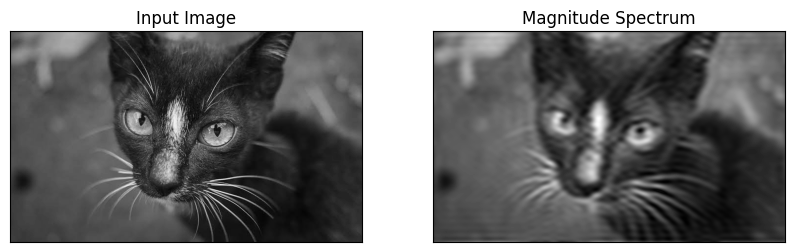

In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image_path = "Cat.jpeg"
image = cv2.imread(image_path, 0)

# hitung discrete Fourier transform

DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30]= 1
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# hitung magnitude DFT

imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

# visualisasi

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()